# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Homework 7: Fairness and Bias


**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2pt">

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### Import Libraries

In [2]:
import random
random.seed(112358)

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_curve, roc_auc_score
)                           
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

<a id="instructions"></a>

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- Please **restart the kernel and run the entire notebook again before you submit.**

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code continues to work, restart the kernel and rerun your notebook periodically while working through this assignment. 

- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. **Please use only the libraries provided in those imports.**

- Please use `.head(...)` when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate and report $R^2$", do not just output the value from a cell. Write a `print(...)` function that clearly labels the output, includes a reference to the calculated value, and rounds it to a reasonable number of digits. **Do not hard code values in your printed output**. For example, this is an appropriate print statement:
```python
print(f'The R^2 is {R:.4f}')
```
- **Your plots MUST be clearly labeled and easy to read,** including clear labels for the $x$ and $y$ axes, a descriptive title ("MSE plot" is NOT a descriptive title; "95% confidence interval of coefficients for degree-5 polynomial model" on the other hand is descriptive), a legend when appropriate, and clearly formatted text and graphics.

- **Your code may also be evaluated for efficiency and clarity.** As a result, correct output is not always sufficient for full credit.

<hr style="height:2pt">

<a id="contents"></a>

## Notebook contents

- [**Required reading and data description**](#intro)


- [**Question 1: Data exploration [26 pts]**](#part1)
  - [Solutions](#part1solutions)


- [**Question 2: Baseline modeling [21 pts]**](#part2)
  - [Solutions](#part2solutions)


- [**Question 3: Predicting without using `race` [19 pts]**](#part3)
  - [Solutions](#part3solutions)


- [**Question 4: Classification thresholds and fairness [34 pts]**](#part4)
  - [Solutions](#part4solutions)

<a id="intro"></a>

## Required reading and data description

[Return to contents](#contents)

### Required reading

The required readings for this homework are two articles that report on the effectiveness of and issues surrounding the COMPAS recidivism algorithm used in U.S. courts. One article is published by ProPublica and the other by the MIT Technology Review:

1. Angwin, Julia; Larson, Jeff; Mattu, Surya; Kirchner, Lauren (2016). "Machine Bias: There’s software used across the country to predict future criminals. And it’s biased against blacks." ProPublica, May 23, 2016. https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing


2. Hao, Karen; Stray, Jonathan (2019). "Can you make AI fairer than a judge? Play our courtroom algorithm game: The US criminal legal system uses predictive algorithms to try to make the judicial process less biased. But there’s a deeper problem." MIT Technology Review, October 17, 2019. https://www.technologyreview.com/2019/10/17/75285/ai-fairer-than-judge-criminal-risk-assessment-algorithm/

You will need to read these articles for the sufficient background needed to successfully complete this homework assignment. It may also be useful to refer back to content covered during the mid-semester lecture on ethics: [Lecture 13: EthiCS](https://edstem.org/us/courses/9045/lessons/23452/slides/138052).

### Data description

In this assignment, we will be analyzing a portion of the data set used by ProPublica in their report. The data are found in the `compas.csv` file and the "data dictionary", which very briefly explains each variable in the data set, can be found in the `compas_datadict.csv` file.

<a id="part1"></a>

## <div class='exercise'>Question 1: Data exploration [26 pts]</div> 
    
[Return to contents](#contents)

**1.1** What is the statistical objective of the COMPAS algorithm?  How is recidivism prediction used in courtrooms?

**1.2** Consider the information in the provided `compas_datadict.csv`.  Which variables are raw data?  Which are pre-processed data?  Which is the target variable of the COMPAS algorithm?  Which are output(s) of the COMPAS algorithm?   Which should not be used in building our own model to predict recidivism?  

**1.3** Read-in the data and split it into 80% training and 20% test **stratified by `race`** (use `random_state=50`). Before splitting, you may want to process the categorical predictors `c_charge_degree`, `race`, and `sex` first so you don't have to do it separately in train and test later.

**1.4** Now we will do a little EDA. Provide visuals to explore which **unprocessed** quantitative variables, including `decile_score` (**not** the derived binary variables or pre-processed versions of the available quantitative variables, for example), are related to `race`.

**HINT:** You may find your Question 1.4 visuals to be more legible and Question 1.5 easier to answer by grouping your non-Caucasion and non-African-American observations together as "all other" racial groups in your plots. However, if you choose to do so, this should only be a temporary grouping of those observations for plotting purposes. Your actual observations should NOT be grouped.

**1.5** Based on your visuals, report which 3 variables appear to have the most significant differences between Caucasians and African Americans. Briefly interpret your findings for each of those 3 variables, being certain to explain your justification for choosing each.

**NOTE:** As illustrated by [the required readings](#intro), reporting on the U.S. Criminal Justice system often concentrates on the disparate experiences between Caucasians and African Americans, thus we have focused our approaches similarly. However, to ensure the efficacy of our models in Question 2 and Question 3, we must be certain to still keep observations for all racial groups included in our data. 

**1.6** With respect to these 3 chosen variables, how could bias in the data or data collection be impacting or causing these differences?

<a id="part1solutions"></a>

## Question 1: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**1.1** What is the statistical objective of the COMPAS algorithm?  How is recidivism prediction used in courtrooms?

</div>

**your answer here**
COMPAS is used to give a score (high, medium, low) on person's risk to society, meaning the likelihood they will commit a crime again. COMPAS also gives scores, using the same ranks as the risk to society, on "criminogenic needs," or explanations as to someone would commit crimes. A few examples are social isolation, drug abuse, and stability. The risk assessment score from COMPAS is available to judges, whether they use or not, when they are making choices in sentencing. It is important to note that judges can use other metrics to decide someone's sentencing or bail but the risk assessment score was seen to be influential, especially for Judge James Babler on the Zilly case.

<div class='exercise-r'>

**1.2** Consider the information in the provided `compas_datadict.csv`.  Which variables are raw data?  Which are pre-processed data?  Which is the target variable of the COMPAS algorithm?  Which are output(s) of the COMPAS algorithm?   Which should not be used in building our own model to predict recidivism?

</div>

**Which variables are raw data? Which are pre-processed data? Which is the target variable of the COMPAS algorithm? Which are output(s) of the COMPAS algorithm? Which should not be used in building our own model to predict recidivism?** 

- The variables that are raw data: **age, sex, race, length_of_stay, priors_count, juv_other_count, c_charge_degree, c_charge_desc, , juv_fel_count, juv_misd_count** \
Raw data is any data that has not been modified in order for the model to interpret it. 

- Pre-processed data: **length_of_stay_thresh, priors_1, priors_234, priors_5plus,juv_fel_1plus, juv_misd_1plus, juv_other_1plus, charge_any_drug, charge_any_violence_aggression charge_any_theft** \
Pre-processed data is any data that has not been modified in order for the model to interpret it or listed as an indicator variable. I would argue this would be any dummy variables or data that has been added to describe certain data points.

- The target variable: **two-year-recid**
- Outputs of the Compas algorithm: **decile_score & score_text**

- The variables that should not be used in building our own model to predict recidivism include: sex and race. These should not be included because they can provide bias in the model. We do not want the model to see any correlation to recidivism and race or gender because this can create biased predictions on those metrics. This bias can come from the data itself or how the data collected. For example, if we have a lot of data points that say men commit recidivism when that doesn't match the true population it could skew our predictions. We will also not include our target variable.


<div class='exercise-r'>

**1.3** Read-in the data and split it into 80% training and 20% test **stratified by `race`** (use `random_state=50`). Before splitting, you may want to process the categorical predictors `c_charge_degree`, `race`, and `sex` first so you don't have to do it separately in train and test later.

</div>

In [3]:
data = pd.read_csv('./data/compas.csv')

# male = 1, Female = 0
sex = (data['sex'] == 'Male').astype(int)
data.insert(6,'sex_int', sex)
race_list = data.race.unique()

#Misdemeanor = 1, Felony = 0
charge_int = (data['c_charge_degree'] == "M").astype(int)
data.insert(2,'charge_int', charge_int)

# use dummy variables for race
dummy_race = pd.get_dummies(data['race'])
data = data.join(dummy_race)
data.head()

,age,c_charge_degree,charge_int,c_charge_desc,race,score_text,sex,sex_int,priors_count,juv_fel_count,...,charge_any_drug,charge_any_violence_aggression,charge_any_theft,length_of_stay_thresh,African-American,Asian,Caucasian,Hispanic,Native American,Other
0,69,F,0,Aggravated Assault w/Firearm,Other,Low,Male,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1,34,F,0,Felony Battery w/Prior Convict,African-American,Low,Male,1,0,0,...,0,1,0,10,1,0,0,0,0,0
2,24,F,0,Possession of Cocaine,African-American,Low,Male,1,4,0,...,1,0,0,1,1,0,0,0,0,0
3,44,M,1,Battery,Other,Low,Male,1,0,0,...,0,1,0,1,0,0,0,0,0,1
4,41,F,0,Possession Burglary Tools,Caucasian,Medium,Male,1,14,0,...,0,0,1,6,0,0,1,0,0,0


In [4]:
x = data.drop(['race','sex', 'c_charge_degree', 'two_year_recid'], axis = 1)
y = data['two_year_recid']
x.head()
#y.head()

,age,charge_int,c_charge_desc,score_text,sex_int,priors_count,juv_fel_count,juv_misd_count,juv_other_count,decile_score,...,charge_any_drug,charge_any_violence_aggression,charge_any_theft,length_of_stay_thresh,African-American,Asian,Caucasian,Hispanic,Native American,Other
0,69,0,Aggravated Assault w/Firearm,Low,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
1,34,0,Felony Battery w/Prior Convict,Low,1,0,0,0,0,3,...,0,1,0,10,1,0,0,0,0,0
2,24,0,Possession of Cocaine,Low,1,4,0,0,1,4,...,1,0,0,1,1,0,0,0,0,0
3,44,1,Battery,Low,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
4,41,0,Possession Burglary Tools,Medium,1,14,0,0,0,6,...,0,0,1,6,0,0,1,0,0,0


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state=50, stratify = data['race'])

<div class='exercise-r'>

**1.4** Now we will do a little EDA. Provide visuals to explore which **unprocessed** quantitative variables, including `decile_score` (**not** the derived binary variables or pre-processed versions of the available quantitative variables, for example), are related to `race`.

**HINT:** You may find your Question 1.4 visuals to be more legible and Question 1.5 easier to answer by grouping your non-Caucasion and non-African-American observations together as "all other" racial groups in your plots. However, if you choose to do so, this should only be a temporary grouping of those observations for plotting purposes. Your actual observations should NOT be grouped.

</div>

In [6]:
# your code here
# unprocessed_all = ['age', 'sex', 'race', 'length_of_stay', 'priors_count', 'juv_other_count', 'c_charge_degree', 
# 'c_charge_desc', 'juv_fel_count', 'juv_misd_count', 'decile_score'] 

African_Am = data[data['African-American'] == 1]
white = data[data['Caucasian'] == 1]
other = data[data['Other'] == 1]
hispanic = data[data['Hispanic'] == 1]
asian = data[data['Asian'] == 1]
Native_Am = data[data['Native American'] == 1]

other_group = pd.concat([hispanic,asian, other,Native_Am])
other_group.head()

,age,c_charge_degree,charge_int,c_charge_desc,race,score_text,sex,sex_int,priors_count,juv_fel_count,...,charge_any_drug,charge_any_violence_aggression,charge_any_theft,length_of_stay_thresh,African-American,Asian,Caucasian,Hispanic,Native American,Other
13,37,M,1,Battery,Hispanic,Low,Male,1,0,0,...,0,1,0,0,0,0,0,1,0,0
21,24,F,0,Lewd/Lasc Battery Pers 12+/<16,Hispanic,Low,Male,1,1,0,...,0,1,0,1,0,0,0,1,0,0
48,30,M,1,Possess Cannabis/20 Grams Or Less,Hispanic,Medium,Male,1,0,0,...,1,0,0,23,0,0,0,1,0,0
56,62,M,1,Unlaw LicTag/Sticker Attach,Hispanic,Low,Male,1,0,0,...,0,0,0,0,0,0,0,1,0,0
60,45,F,0,Possession of Cocaine,Hispanic,Low,Male,1,6,0,...,1,0,0,30,0,0,0,1,0,0


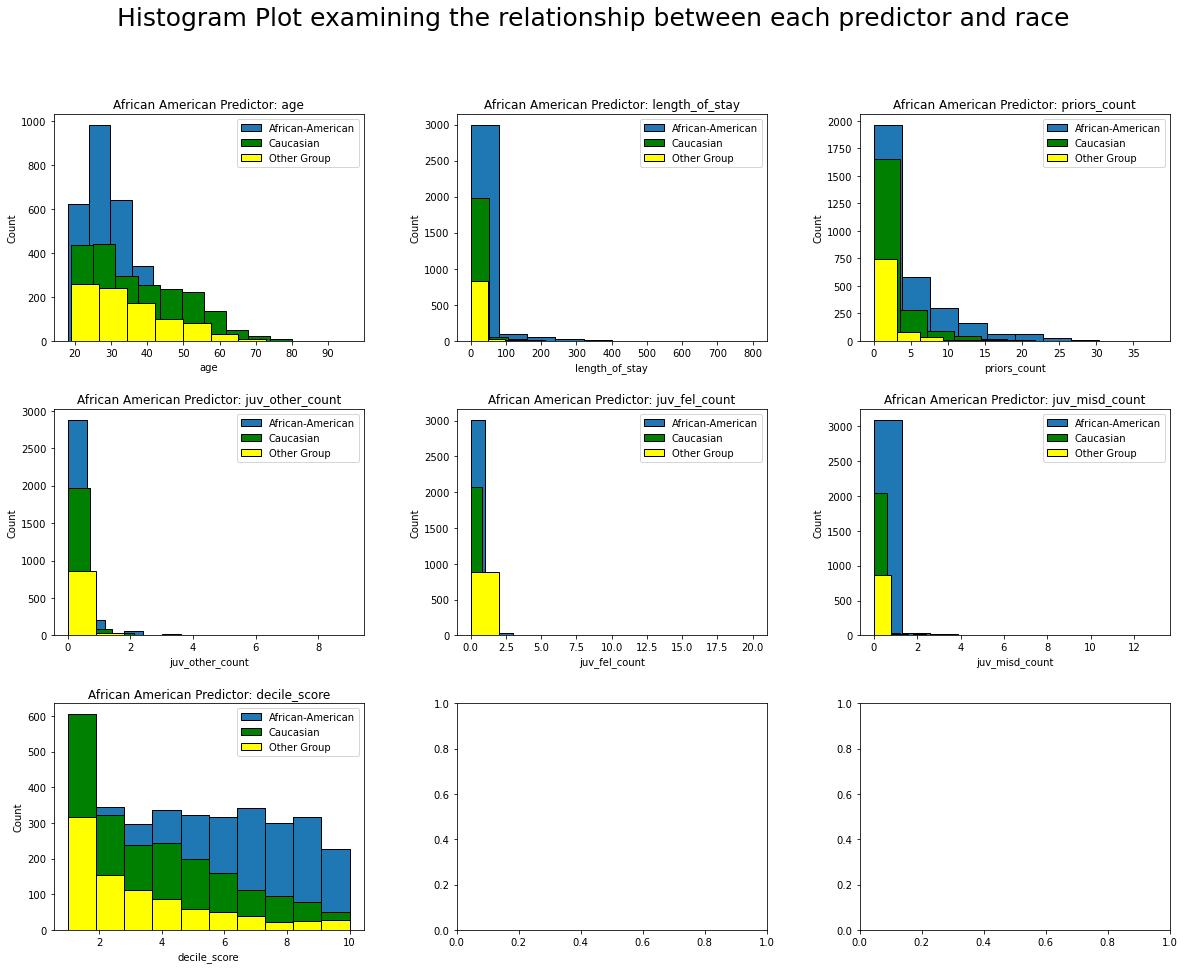

In [7]:
unprocessed = ['age', 'length_of_stay', 'priors_count', 'juv_other_count', 'juv_fel_count', 
               'juv_misd_count', 'decile_score']  # 7 columns


fig, axs = plt.subplots(3,3, figsize = (20, 15))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
axs = axs.flatten()
plt.suptitle("Histogram Plot examining the relationship between each predictor and race", fontsize = 25)
for i in range(0,7):
    axs[i].hist(African_Am[unprocessed[i]], edgecolor = 'black', label = "African-American")
    axs[i].hist(white[unprocessed[i]], edgecolor = 'black', color = 'green', label = 'Caucasian')
    axs[i].hist(other_group[unprocessed[i]], edgecolor = 'black', color = 'yellow', label = 'Other Group')
    axs[i].set_title(f"African American Predictor: {unprocessed[i]}")
    axs[i].set_ylabel("Count")
    axs[i].set_xlabel(f"{unprocessed[i]}")
    axs[i].legend()




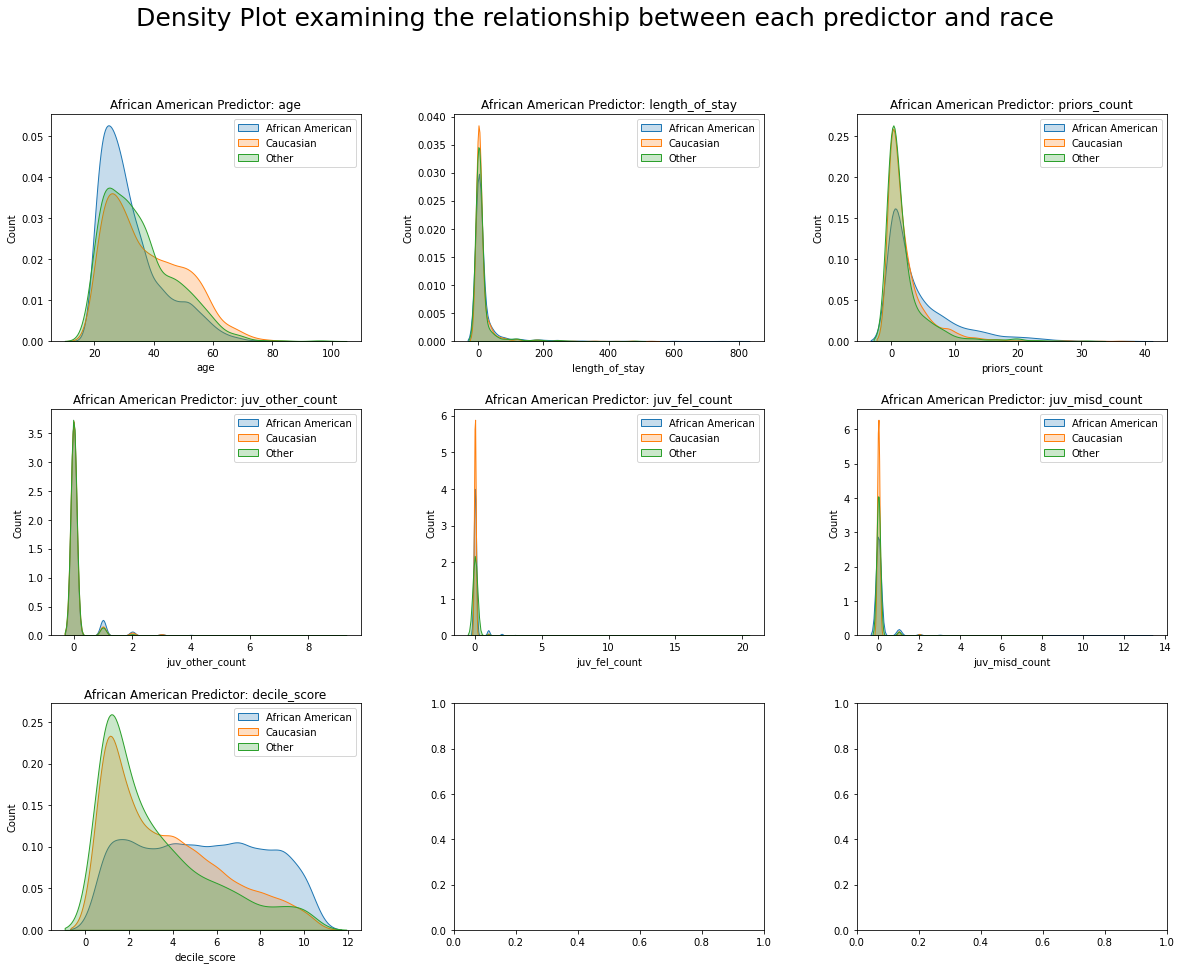

In [8]:
unprocessed = ['age', 'length_of_stay', 'priors_count', 'juv_other_count', 'juv_fel_count', 
               'juv_misd_count', 'decile_score']  # 7 columns


fig, axs = plt.subplots(3,3, figsize = (20, 15))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
axs = axs.flatten()
plt.suptitle(" Density Plot examining the relationship between each predictor and race", fontsize = 25)
for i in range(0,7):
    sns.kdeplot(African_Am[unprocessed[i]],x = unprocessed[i],ax = axs[i], label = 'African American', fill = True)
    sns.kdeplot(white[unprocessed[i]],x = unprocessed[i],ax = axs[i], label = 'Caucasian', fill = True)
    sns.kdeplot(other_group[unprocessed[i]],x = unprocessed[i],ax = axs[i], label = 'Other', fill = True)
    axs[i].set_title(f"African American Predictor: {unprocessed[i]}")
    axs[i].set_ylabel("Count")
    axs[i].set_xlabel(f"{unprocessed[i]}")
    axs[i].legend()

<div class='exercise-r'>

**1.5** Based on your visuals, report which 3 variables appear to have the most significant differences between Caucasians and African Americans. Briefly interpret your findings for each of those 3 variables, being certain to explain your justification for choosing each.

**NOTE:** As illustrated by [the required readings](#intro), reporting on the U.S. Criminal Justice system often concentrates on the disparate experiences between Caucasians and African Americans, thus we have focused our approaches similarly. However, to ensure the efficacy of our models in Question 2 and Question 3, we must be certain to still keep observations for all racial groups included in our data. 

</div>

---

**your answer here**
Using the Density plot, the 3 variables that appear to have the most significant differences between Caucasians and African Americans are:

- Decile Score: The African Americans have a higher density across the higher decile_score. The decile_score is the rating given for the assessment. They typically rate 'high' if the value is above a 7. This shows that African Americans when compared to Caucasians are getting distributed among much higher values, meaning their are getting more medium and high risk scores.

- Age: We can see that there are a higher peak of younger African American people that are getting presented before the court than Caucasians. This could relate to who is getting caught for crimes or who is getting stopped. 

- prior_count: We can see that the prior count is MUCH smaller for African Americans than Caucasians. This means that African Americans are still being brought before the court when they have lower prior counts than Caucasians. This could relate to the difference in age. The younger the person the less likely they have committed crimes do to time. 

<div class='exercise-r'>

**1.6** With respect to these 3 chosen variables, how could bias in the data or data collection be impacting or causing these differences?

</div>

**your answer here** \
With respect to the 3 chosen variables, bias in the data/data collection can be impacting the seen outcomes. Due to American history on the War on Drugs and mass incarceration rates, we know that on average people of color, specifically African Americans, are incarcerated at much higher rates than Caucasians because of who police officers pull over, and who performs crimes due to lower economic status. Since we know this background, we can make sense of how age, decile score, and prior count are bias. Age can be different between Caucasians and white because young African Americans could have been targeted and therefore give us more data points. The prior count different matches what is seen with age because if an African American is getting pulled in when they are younger they are less likely to have charges against them. The decile score could then be influenced be skewed because if there are just larger data points from African Americans they will more likely cover a larger spread of the risk assessment. This difference in decile scores also perpetuates itself because if African Americans are getting higher risk scores they are more likely going to get African Americans who commit crimes. By having more African Americans that commit crimes, it taught the COMPAS model to see African Americans as more dangerous, which is what we are trying to prove and what we saw in the literature.

---

<a id="part2"></a>

## <div class="exercise">Question 2: Baseline modeling [21 pts]</div> 
    
[Return to contents](#contents)

**2.1**  Build a well-tuned $LASSO$-like regularized logistic regression model to predict recidivism (i.e. `two_year_recid` is your response variable). Use the following predictors: `age`, `priors_1`, `priors_234`, `priors_5plus`, `juv_fel_1plus`, `juv_misd_1plus`, `juv_other_1plus`, `charge_any_drug`, `charge_any_violence_aggression`, `charge_any_theft`, as well as your one-hot-encoded predictors for `c_charge_degree`, `sex`, and `race`. Report your resulting coefficients and interpret what this model is saying about the relationship of `two_year_recid` to `race`.


**2.2**  Report the following on the **test set**:

1. **Overall model accuracy score**


2. **False positive rates (FPR)** for each of the two groups (please note that a "positive" here is `two_year_recid==1`)
    - `African-American`
    - `Cacausian`
    
    
3. **False negative rates (FNR)** for each of the two groups:
    - `African-American`
    - `Caucasian`


4. **Ratios of error rates**:
    - Ratio of the FPR between `African-American` and `Caucasian` groups
    - Ratio of the FNR between `African-American` and `Caucasian` groups
    - These ratios can be expressed as:

$$\frac{FPR(AA)}{FPR(CC)} \; \text{and} \; \frac{FNR(AA)}{FNR(CC)}$$


**2.3**  What do you observe? Is there any disparity in the $FPR$ and $FNR$ for the two groups? What are the implications of your findings? Explain your findings in 3-6 sentences.
    
  

<a id="part2solutions"></a>

## Question 2: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**2.1**  Build a well-tuned $LASSO$-like regularized logistic regression model to predict recidivism (i.e. `two_year_recid` is your response variable). Use the following predictors: `age`, `priors_1`, `priors_234`, `priors_5plus`, `juv_fel_1plus`, `juv_misd_1plus`, `juv_other_1plus`, `charge_any_drug`, `charge_any_violence_aggression`, `charge_any_theft`, as well as your one-hot-encoded predictors for `c_charge_degree`, `sex`, and `race`. Report your resulting coefficients and interpret what this model is saying about the relationship of `two_year_recid` to `race`.

</div>

In [9]:
# scale = MinMaxScaler().fit(x_train[["age"]])
# x_train[["age"]] = scale.transform(x_train[["age"]])
# x_test[["age"]] = scale.transform(x_test[["age"]])
predictors = ['age', 'priors_1', 'priors_234','priors_5plus', 'juv_fel_1plus', 'juv_misd_1plus', 'juv_other_1plus', 
'charge_any_drug', 'charge_any_violence_aggression', 'charge_any_theft','sex_int','charge_int','African-American', 
'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other']

#need to scale for Lasso
scale = MinMaxScaler().fit(x_train[predictors])
x_train = pd.DataFrame(scale.transform(x_train[predictors]), columns = predictors)
x_test = pd.DataFrame(scale.transform(x_test[predictors]),columns = predictors)
x_test.head()

,age,priors_1,priors_234,priors_5plus,juv_fel_1plus,juv_misd_1plus,juv_other_1plus,charge_any_drug,charge_any_violence_aggression,charge_any_theft,sex_int,charge_int,African-American,Asian,Caucasian,Hispanic,Native American,Other
0,0.076923,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.230769,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.064103,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.461538,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.205128,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
predictors = ['age', 'priors_1', 'priors_234','priors_5plus', 'juv_fel_1plus', 'juv_misd_1plus', 'juv_other_1plus', 
'charge_any_drug', 'charge_any_violence_aggression', 'charge_any_theft','sex_int','charge_int','African-American', 
'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other']


lr = LogisticRegressionCV(solver = 'liblinear', penalty = 'l1', max_iter =1000)
xtrain_lasso = x_train.copy()
xtest_lasso = x_test.copy()

lr.fit(xtrain_lasso, y_train)
y_pred = lr.predict(xtest_lasso)

coef = lr.coef_[0]
intercept = lr.intercept_[0]

print("List of Predictors and their Coefficients")
print('intercept:', round(intercept,3))
for i in range(len(predictors)):
    print(predictors[i], ":", round(coef[i],3))



List of Predictors and their Coefficients
intercept: -0.247
age : -2.19
priors_1 : 0.012
priors_234 : 0.544
priors_5plus : 1.346
juv_fel_1plus : 0.0
juv_misd_1plus : 0.0
juv_other_1plus : 0.423
charge_any_drug : 0.071
charge_any_violence_aggression : 0.0
charge_any_theft : 0.099
sex_int : 0.053
charge_int : -0.2
African-American : 0.116
Asian : 0.0
Caucasian : 0.0
Hispanic : 0.0
Native American : 0.0
Other : 0.0


**INTERPRETATION:**

**your answer here** \
These coefficients come from a lasso like regression model that uses all of the coefficients. The race dummy variables are African-American, Asian, Caucasian, Hispanic, Native American, and other. All of these are categorical variables, meaning that they have either a 1 or 0 with 1 meaning that the value is expressed whereas or 0 means the value isn't expressed. For example, African-American with 1 means that you identify as African American whereas a 0 means you do not. Since the intercept is a positive value, any coefficient that is positive with a 1 expressed for the predictor will increase the likelihood of the prediction of recidivism. With a 0, it will not add to the equation. This can be seen in using the formula of Bayes' Classifier from Logistic Regression below with just looking at the African American example. 

$ln(\dfrac{P(Y=1)}{P(Y=0)} = \beta_0 + \beta_{African\_American}* X_{African\_American} $ 

$ln(\dfrac{P(Y=1)}{P(Y=0)} = 0.038 + 0.179* X_{African\_American} $

This shows that if someone is African-American or $X_{African-American} = 1$ then we will move up the line.The coefficient for African-American is positive meaning that if someone is one of those then their chances of recidivism increases. The values that have zero (Asian, Native American, other, Hispanic and Caucasian) mean that there is no affect on recidivism and these are zero because Lasso deems them unimportant.

<div class='exercise-r'>

**2.2**  Report the following on the **test set**:

1. **Overall model accuracy score**


2. **False positive rates (FPR)** for each of the two groups (please note that a "positive" here is `two_year_recid==1`)
    - `African-American`
    - `Cacausian`
    
    
3. **False negative rates (FNR)** for each of the two groups:
    - `African-American`
    - `Caucasian`


4. **Ratios of error rates**:
    - Ratio of the FPR between `African-American` and `Caucasian` groups
    - Ratio of the FNR between `African-American` and `Caucasian` groups
    - These ratios can be expressed as:

$$\frac{FPR(AA)}{FPR(CC)} \; \text{and} \; \frac{FNR(AA)}{FNR(CC)}$$

</div>

In [11]:
# your code here
acc_test = round(accuracy_score(y_test, y_pred)*100,2)
print(f"Here is the accuracy score from the test set: {acc_test}%")

Here is the accuracy score from the test set: 66.88%


In [12]:
#false positive when two_year == 0 & y_pred == 1
mask_white = (x_test['Caucasian'] == 1).values
mask_AA = (x_test['African-American'] == 1).values


# #African American FPR (amount of False Positives/ total predictions)
y_test_AA = y_test[mask_AA]
y_pred_AA = y_pred[mask_AA]

FP_AA = ((y_test_AA == 0) & (y_pred_AA== 1)).sum()
all_neg = (y_test_AA == 0).sum()
FP_AA_rate =round((FP_AA/all_neg)*100,2)
print(f"Here is the False Positive rate for African Americans {FP_AA_rate}%")

# Caucasian FPR
y_test_white = y_test[mask_white]
y_pred_white = y_pred[mask_white]


FP_white = ((y_test_white == 0) & (y_pred_white==1)).sum()
all_neg_w = (y_test_white == 0).sum()
FP_white_rate =round((FP_white/all_neg_w)*100,2)
print(f"Here is the False Positive rate for Caucasians: {FP_white_rate}%")

#False Positive ratio
FP_ratio = (FP_AA_rate/FP_white_rate)
print(f"False Positive Ratio with African American over Caucasians: {FP_ratio:.3f}")

Here is the False Positive rate for African Americans 33.01%
Here is the False Positive rate for Caucasians: 17.51%
False Positive Ratio with African American over Caucasians: 1.885


In [13]:
# False Negative AA
mask_white = (x_test['Caucasian'] == 1).values
mask_AA = (x_test['African-American'] == 1).values

# African American
y_test_AA = y_test[mask_AA]
y_pred_AA = y_pred[mask_AA]
FN_AA = ((y_test_AA == 1) & (y_pred_AA == 0)).sum()
total_pos = (y_test_AA == 1).sum()
FN_AA_rate = round((FN_AA/total_pos)*100,2)
print(f"Here is the False Negative rate for African-Americans {FN_AA_rate}%")


# Caucasian
y_test_white = y_test[mask_white]
y_pred_white = y_pred[mask_white]
FN_white = ((y_test_white == 1) & (y_pred_white == 0)).sum()
total_pos = (y_test_white == 1).sum()
FN_white_rate = round((FN_white/total_pos)*100,2)
print(f"Here is the False Negative rate for Caucasians {FN_white_rate}%")

# Ratio of the two 
#False Positive ratio
FN_ratio = round((FN_AA_rate/FN_white_rate),3)
print(f"False Negative Ratio with African Americans over Caucasians {FN_ratio}")

Here is the False Negative rate for African-Americans 34.36%
Here is the False Negative rate for Caucasians 53.66%
False Negative Ratio with African Americans over Caucasians 0.64


<div class='exercise-r'>

**2.3**  What do you observe? Is there any disparity in the $FPR$ and $FNR$ for the two groups? What are the implications of your findings? Explain your findings in 3-6 sentences.

</div>

**your answer here** \
Based on these numbers, the FNR  is higher for Caucasians whereas the FPR is higher for African-Americans. The FPR means that that we think African-Americans are more likely to not go back to jail than what are being predicted. The FNR means that we think more Caucasians are more like to go back to jail than what is being predicted. The implication is that the model is predicting more African Americans are likely to go back to jail (recidivism) than what is actually happening. These outcomes show that the model is likely biased towards African Americans and would be more likely to give them to higher decile score and risk assessment. 

<a id="part3"></a>

## <div class='exercise'>Question 3: Predicting without using `race` [19 pts]</div> 
    
[Return to contents](#contents)

**3.1** Fit another well-tuned $LASSO$-like regularized logistic regression model just as you did in Question 2.1, but this time **without** `race` as a predictor. Report your resulting coefficients.

**3.2** Again, report the following on the **test set**:

1. **Overall model accuracy score**


2. **False positive rates (FPR)** for each of the two groups (please note that a "positive" here is `two_year_recid==1`)
    - `African-American`
    - `Cacausian`
    
    
3. **False negative rates (FNR)** for each of the two groups:
    - `African-American`
    - `Caucasian`


4. **Ratios of error rates**:
    - Ratio of the FPR between `African-American` and `Caucasian` groups
    - Ratio of the FNR between `African-American` and `Caucasian` groups
    - These ratios can be expressed as:

$$\frac{FPR(AA)}{FPR(CC)} \; \text{and} \; \frac{FNR(AA)}{FNR(CC)}$$


**3.3**  How do these metrics compare to the model when the variable `race` **is** included as a predictor?

**3.4**  Given your exploration and modeling of the data, should a predictive tool be trusted to be unbiased even if it doesn’t explicitly use a variable such as race to predict future crime?  Why or why not? Give careful consideration to why the bias is still occurring or not still occurring in your results and what the real-life implications/effects might be for such a tool.

<a id="part3solutions"></a>

## Question 3: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**3.1** Fit another well-tuned $LASSO$-like regularized logistic regression model just as you did in Question 2.1, but this time **without** `race` as a predictor. Report your resulting coefficients.

</div>

In [14]:
# your code here
predictors = ['age', 'priors_1', 'priors_234','priors_5plus', 'juv_fel_1plus', 'juv_misd_1plus', 'juv_other_1plus', 
'charge_any_drug', 'charge_any_violence_aggression', 'charge_any_theft','sex_int','charge_int']
lr = LogisticRegressionCV(solver = 'liblinear', penalty = 'l1', max_iter =1000)
xtrain_lasso = x_train[predictors]
xtest_lasso = x_test[predictors]

lr.fit(xtrain_lasso, y_train)
y_pred = lr.predict(xtest_lasso)

coef = lr.coef_[0]
intercept = lr.intercept_[0]

print("List of Predictors and their Coefficients")
for i in range(len(predictors)):
    print(predictors[i], ":", round(coef[i],3))

print('intercept:', round(intercept,3))


List of Predictors and their Coefficients
age : -3.003
priors_1 : 0.376
priors_234 : 0.897
priors_5plus : 1.749
juv_fel_1plus : 0.046
juv_misd_1plus : 0.138
juv_other_1plus : 0.563
charge_any_drug : 0.312
charge_any_violence_aggression : 0.15
charge_any_theft : 0.386
sex_int : 0.259
charge_int : -0.161
intercept: -0.627


<div class='exercise-r'>

**3.2** Again, report the following on the **test set**:

1. **Overall model accuracy score**


2. **False positive rates (FPR)** for each of the two groups (please note that a "positive" here is `two_year_recid==1`)
    - `African-American`
    - `Cacausian`
    
    
3. **False negative rates (FNR)** for each of the two groups:
    - `African-American`
    - `Caucasian`


4. **Ratios of error rates**:
    - Ratio of the FPR between `African-American` and `Caucasian` groups
    - Ratio of the FNR between `African-American` and `Caucasian` groups
    - These ratios can be expressed as:

$$\frac{FPR(AA)}{FPR(CC)} \; \text{and} \; \frac{FNR(AA)}{FNR(CC)}$$

</div>

In [15]:
# your code here
acc_test = round(accuracy_score(y_test, y_pred)*100,2)
print(f"Here is the accuracy score from the test set: {acc_test}%")


Here is the accuracy score from the test set: 68.26%


In [16]:
mask_white = (x_test['Caucasian'] == 1).values
mask_AA = (x_test['African-American'] == 1).values

# African American FPR
y_test_AA = y_test[mask_AA]
y_pred_AA = y_pred[mask_AA]
FP = ((y_test_AA == 0)& (y_pred_AA == 1)).sum()
all_neg = (y_test_AA == 0).sum()
FP_rate_AA = round((FP/all_neg)*100,2)
print(f"Here is the False Positive Rate for African Americans: {FP_rate_AA}%")

# White FPR
y_test_white = y_test[mask_white]
y_pred_white = y_pred[mask_white]
FP_white = ((y_test_white == 0)&(y_pred_white ==1)).sum()
all_neg = (y_test_white == 0).sum()
FP_rate_white = round((FP_white/all_neg)*100,2)
print(f"Here is the False Positive Rate for Caucasians: {FP_rate_white}%")

#ratio
FP_ratio = round((FP_rate_AA/FP_rate_white),3)
print(f"The False Positive ratio with African Americans over Caucasians: {FP_ratio}")


Here is the False Positive Rate for African Americans: 33.33%
Here is the False Positive Rate for Caucasians: 21.01%
The False Positive ratio with African Americans over Caucasians: 1.586


In [17]:
mask_white = (x_test['Caucasian'] == 1).values
mask_AA = (x_test['African-American'] == 1).values

#FNR African American
y_test_AA = y_test[mask_AA]
y_pred_AA = y_pred[mask_AA]
FN_AA = ((y_pred_AA == 0)& (y_test_AA ==1)).sum()
all_pos = (y_test_AA == 1).sum()
FN_rate_AA = round((FN_AA/all_pos)*100,2)
print(f"Here is the False Negative rate for African Americans: {FN_rate_AA}%")

#FNR Caucasian
y_test_white = y_test[mask_white]
y_pred_white = y_pred[mask_white]
FN_white = ((y_pred_white == 0)&(y_test_white ==1)).sum()
all_pos = (y_test_white == 1).sum()
FN_rate_white = round((FN_white/all_pos)*100,2)
print(f"Here is the False Negative rate for Caucasians: {FN_rate_white}%")

# FNR ratio
FN_ratio = round((FN_rate_AA/FN_rate_white),3)
print(f"The False Negative ratio with African Americans over Caucasians: {FN_ratio}")


Here is the False Negative rate for African Americans: 30.37%
Here is the False Negative rate for Caucasians: 47.56%
The False Negative ratio with African Americans over Caucasians: 0.639


<div class='exercise-r'>

**3.3**  How do these metrics compare to the model when the variable `race` **is** included as a predictor?

</div>

**your answer here**  
Without race, the model's test accuracy slightly improves by about 2%. The False positive rates for African Americans also increases slightly and the False Negative rates for African Americans increase without race. We see the opposite happen for Caucasians meaning False Positive rates increase and False Negative rates drop. The False Positive Ratio  decreases by about 0.3 without race, which is a good measure showing that race can affect False Positive Rates. The False Negative Ratio slightly decreases (0.1) without race.

<div class='exercise-r'>

**3.4**  Given your exploration and modeling of the data, should a predictive tool be trusted to be unbiased even if it doesn’t explicitly use a variable such as race to predict future crime?  Why or why not? Give careful consideration to why the bias is still occurring or not still occurring in your results and what the real-life implications/effects might be for such a tool.

</div>

**your answer here**

Given the above questions, it should not be trusted that a predictive tool is seen to be unbiased if it doesn't explicity see a variable like race. This could be because the data itself is actually biased regardless of having the race indicators. The data collection process could have been biased based on where the data was pulled and how the data was recorded. For example, race indicators are not always clear and people who are biracial have difficulty choosing or selecting one representation of their identity. If we represented biracial persons in our dataframe, it would defeat the purpose of the one hot encoding we did or we would have to create a new term for each mixture. Another problem with the race indicators is that we don't know how that data is collected. We do not know if this is a self-identification or if someone else identifiying the person.

Another item is that American society has targeted and targets people of color, which then influences the data.  This dataset is also not potentially representative of our population in general because we can see the data points from each race to be different. This data is also not a great measure to predict future crime because crime rates can be impacted generationally. For example, crimes, which were mostly petty crimes, increased during COVID because of the increase of job losses. This would create outliers in the data because the people who were committing crimes were lower income, which people of color are, disproportionally, due to structural racism. 

<a id="part4"></a>

## <div class='exercise'>Question 4: Classification thresholds and fairness [34 pts]</div> 
    
[Return to contents](#contents)

**4.1** Use the logistic regression model from Question 3.1 and plot the Receiver Operating Characteristic (ROC) curves for two racial groups: `African-American` and `Caucasian` in the **training set**.
    
**4.2** The default threshold used for determining the classification metrics analyzed in Question 2.2 and Question 3.2 was $\hat{p}=0.5$.  Choose a new single threshold for the model from Question 3.1 that will reduce the bias between these two racial groups as measured by the "Ratios of Error Rates" (as defined by the formulas shown in Question 3.2). Be certain to justify your choice and interpet how this threshold choice affects your model results.

**HINT:** There is no one correct answer here. However, to arrive at an answer you can support with an evidence-based justification, you will likely need to inspect the "Ratio of $FPR$", "Ratio of $FNR$", and accuracy trends across varying classification thresholds. There should be no need to refit your model from Question 3.1 to accomplish this task.

**4.3** A second approach to reducing bias is to use different thresholds for the different racial groups to better ensure that the individual groups have similar false positive and false negative rates.  Choose a pair of thresholds (one for the `African-American` group and one for the `Caucasian` group) that improves the group bias (while still taking accuracy into consideration). Be certain to justify your choices and interpet how these threshold choices affect your model results.

**HINT:** To arrive at an answer you can support with an evidence-based justification, you will likely need to inspect $FPR$, $FNR$, and accuracy trends across varying classification thresholds for each group (`African-American` and `Caucasian`) individually. There should be no need to refit your model from Question 3.1 to accomplish this task.

**4.4** Comment on [the fairness](<https://en.wikipedia.org/wiki/Fairness_(machine_learning)>) of the two methods in Question 4.2 and Question 4.3 from two different perspectives: the fairness of each group (called "group fairness") and the fairness for an individual defendant (called "individual fairness"). 

**4.5** Changing the thresholds can *reduce* bias between the two classes, but it can also affect model accuracy. We want our model to be **accurate** but also **fair**.  What can be done to balance these two criteria?  Write down your strategy to overcome this difficulty. Please limit your response to at most 150 words.  
     

<a id="part4solutions"></a>

## Question 4: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**4.1** Use the logistic regression model from Question 3.1 and plot the Receiver Operating Characteristic (ROC) curves for two racial groups: `African-American` and `Caucasian` in the **training set**.

</div>

In [18]:
# your code here
predictors = ['age', 'priors_1', 'priors_234','priors_5plus', 'juv_fel_1plus', 'juv_misd_1plus', 'juv_other_1plus', 
'charge_any_drug', 'charge_any_violence_aggression', 'charge_any_theft','sex_int','charge_int']

# African American 
mask_white = (x_train['Caucasian'] == 1).values
mask_AA = (x_train['African-American'] == 1).values


y_train_AA = y_train[mask_AA]

AA_train = x_train[x_train['African-American']==1]
yhat_AA= lr.predict_proba(AA_train[predictors])[:,1]
fprAA, tprAA, thresholds = roc_curve(y_train_AA, yhat_AA)

# Caucasian

y_train_white = y_train[mask_white]

white_train = x_train[x_train['Caucasian']==1]
yhat_white= lr.predict_proba(white_train[predictors])[:,1]
fprwhite, tprwhite, thresholds = roc_curve(y_train_white, yhat_white)



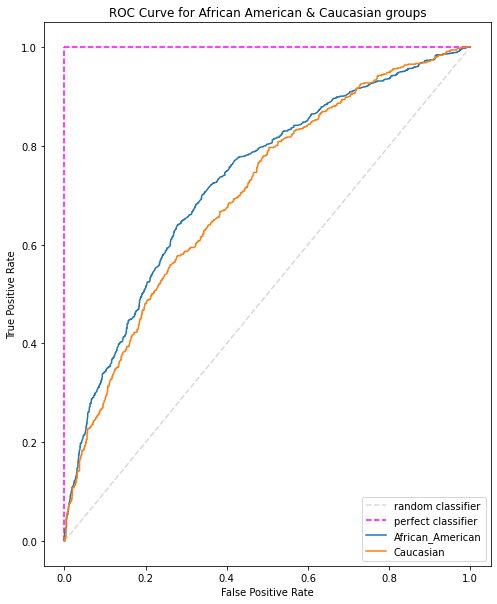

In [19]:
x=np.arange(0,100)/100
plt.figure(figsize=(8,10))
plt.plot(x,x,'--',color="gray",alpha=0.3, label = "random classifier")
plt.plot([0,1],[1,1],'--',color="magenta", label = "perfect classifier")
plt.plot([0,0],[0,1],'--',color="magenta")
plt.plot(fprAA,tprAA,'-',label="African_American") 
plt.plot(fprwhite,tprwhite,'-',label="Caucasian") 
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for African American & Caucasian groups")
plt.legend()
plt.show()

<div class='exercise-r'>

**4.2** The default threshold used for determining the classification metrics analyzed in Question 2.2 and Question 3.2 was $\hat{p}=0.5$.  Choose a new single threshold for the model from Question 3.1 that will reduce the bias between these two racial groups as measured by the "Ratios of Error Rates" (as defined by the formulas shown in Question 3.2). Be certain to justify your choice and interpet how this threshold choice affects your model results.

**HINT:** There is no one correct answer here. However, to arrive at an answer you can support with an evidence-based justification, you will likely need to inspect the "Ratio of $FPR$", "Ratio of $FNR$", and accuracy trends across varying classification thresholds. There should be no need to refit your model from Question 3.1 to accomplish this task.

</div>

In [20]:
# your code here
mask_white = (x_train['Caucasian'] == 1).values
mask_AA = (x_train['African-American'] == 1).values

yhat_all = lr.predict_proba(x_train[predictors])[:,1]


thresholds_list = np.linspace(0.1,0.88,1000)

FP_ratio = []
FN_ratio = []
accuracy_list = []

for i in thresholds_list:
    class_label = (yhat_all > i).astype(int)
    accuracy = (class_label == y_train).mean()
    accuracy_list.append(accuracy)
    
    #All False Positive
    #African American
    AA = ((class_label[mask_AA] == 1) & (y_train[mask_AA] == 0)).sum()
    all_neg_AA = (y_train[mask_AA] == 0).sum()
    FPR_AA = AA/all_neg_AA
    
    #white
    white = ((class_label[mask_white] == 1) & (y_train[mask_white] == 0)).sum()
    all_neg_white = (y_train[mask_white] == 0).sum()
    FPR_white = white/all_neg_white
    
    FPratio = FPR_AA/FPR_white
    FP_ratio.append(FPratio)
    
    # False Negative
    #African American
    AA_FN = ((class_label[mask_AA] == 0) & (y_train[mask_AA] == 1)).sum()
    all_pos_AA = (y_train[mask_AA] == 1).sum()
    FNR_AA = AA_FN/all_pos_AA
    
    
    #Caucasian
    white_FN = ((class_label[mask_white] == 0) & (y_train[mask_white] == 1)).sum()
    all_pos_white = (y_train[mask_white] == 1).sum()
    FNR_white = white_FN/all_pos_white
    
    FNratio = FNR_AA/FNR_white
    FN_ratio.append(FNratio)
    




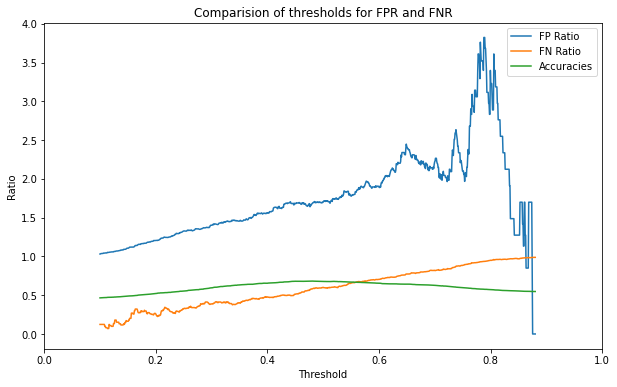

In [21]:
#Plotting
plt.figure(figsize = (10,6))
plt.plot(thresholds_list,FP_ratio, label = "FP Ratio")
plt.plot(thresholds_list,FN_ratio, label = "FN Ratio")
plt.plot(thresholds_list, accuracy_list, label = "Accuracies")
plt.title("Comparision of thresholds for FPR and FNR")
plt.ylabel("Ratio")
plt.xlabel("Threshold")
plt.xlim([0,1])
plt.legend()


In [25]:

index = np.where((thresholds_list > 0.3))
index = index[0][0]
print("threshold chosen:", round(thresholds_list[index],3))
print("lowest FP ratio with associated threshold:", round(FP_ratio[index],3))
print("Accuracy value associated threshold:", round(accuracy_list[index],3))
best_accuracy = max(accuracy_list)
print(f"Max accuracy: {best_accuracy:2f}")
min_acc = min(accuracy_list)
print(f"Smallest accuracy:{min_acc: 2f}")

threshold chosen: 0.301
lowest FP ratio with associated threshold: 1.402
Accuracy value associated threshold: 0.595
Max accuracy: 0.682601
Smallest accuracy: 0.465667


**INTERPRETATION:**

**Be certain to justify your choice and interpet how this threshold choice affects your model results** \
I would want to chose a threshold that keeps accuracy high and has a lower false positive ratio that is closer to one. By being closer to one means that the false positive rates are closer for both caucasians and african americans, meaning that not one group is being affected more. With this accuracy and False positive ratio trade off, I am choosing a threshold of 0.3 because it has a false positive rate of 1.402 and accuracy around 60%. This threshold will decrease the false positive rates from the previous models explored in questions in problems 2 and 3 while keeping the accuracy in the ball park. 

I am choosing this outcome in the context of this question and off of what we know the reading. We already saw how these outputs affect African Americans worse than Caucasians. While we should consider what kind of crimes are being commited, we do not have that within this dataset. We would want to have a higher False Negative rate for crimes that I would consider to be morally worse such as rape or murder, meaning a lower false positive rate. It is also important to potentially consider how this threshold affects other groups, which we do not consider in this context. This threshold could potentially create a negative impact on Hispanics or Asians. 

<div class='exercise-r'>

**4.3** A second approach to reducing bias is to use different thresholds for the different racial groups to better ensure that the individual groups have similar false positive and false negative rates.  Choose a pair of thresholds (one for the `African-American` group and one for the `Caucasian` group) that improves the group bias (while still taking accuracy into consideration). Be certain to justify your choices and interpet how these threshold choices affect your model results.

**HINT:** To arrive at an answer you can support with an evidence-based justification, you will likely need to inspect $FPR$, $FNR$, and accuracy trends across varying classification thresholds for each group (`African-American` and `Caucasian`) individually. There should be no need to refit your model from Question 3.1 to accomplish this task.

</div>

In [23]:
# your code here
AA_df = x_train[x_train['African-American'] == 1]

mask_white = (x_train['Caucasian'] == 1).values
mask_AA = (x_train['African-American'] == 1).values

yhat_AA= lr.predict_proba(AA_df[predictors])[:,1]

fpr_AA, tpr_AA, thresholds_AA = roc_curve(y_train[mask_AA], yhat_AA)
fnr_AA = 1-tpr_AA

white_df = x_train[x_train['Caucasian'] == 1]


yhat_white = lr.predict_proba(white_df[predictors])[:,1]

fpr_white, tpr_white, thresholds_white = roc_curve(y_train[mask_white], yhat_white)
fnr_white = 1-tpr_white

yhat_full= lr.predict_proba(x_train[predictors])[:,1]
threshold_list = np.linspace(0,1,1000)
accuracy_list = []

for i in thresholds_list:
    class_label = (yhat_full > i).astype(int)
    accuracy = (class_label == y_train).mean()
    accuracy_list.append(accuracy)
    

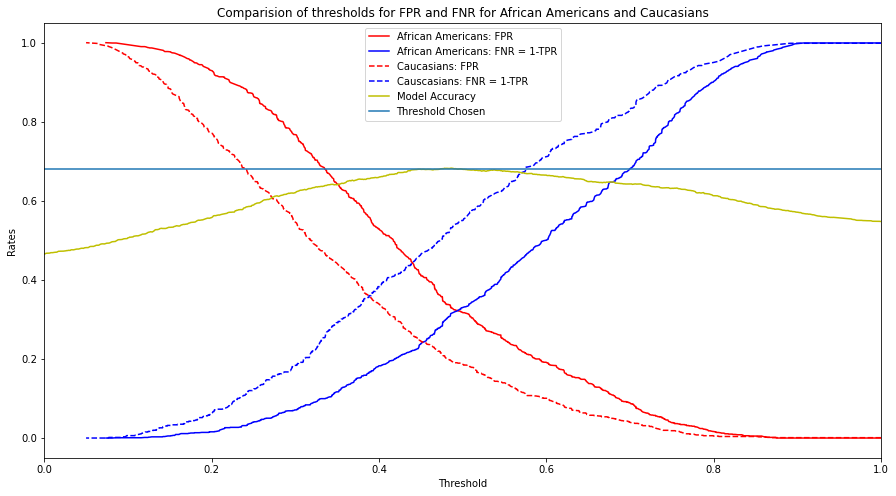

In [24]:
#Plotting
plt.figure(figsize = (15,8))
plt.plot(thresholds_AA,fpr_AA,'r-' ,label = "African Americans: FPR")
plt.plot(thresholds_AA,fnr_AA,'b-' ,label = "African Americans: FNR = 1-TPR")
plt.plot(thresholds_white,fpr_white,'r--' ,label = "Caucasians: FPR")
plt.plot(thresholds_white,fnr_white,'b--' ,label = "Causcasians: FNR = 1-TPR")
plt.plot(threshold_list, accuracy_list, 'y',label = "Model Accuracy")
plt.axhline(0.68, label = 'Threshold Chosen')
plt.title("Comparision of thresholds for FPR and FNR for African Americans and Caucasians")
plt.ylabel("Rates")
plt.xlabel("Threshold")
plt.xlim([0,1])
plt.legend()

**INTERPRETATION:**

**your answer here** \
Based off of the graph of False Positive and False Negative rates for African Americans and Caucasians, I would choose a rate of 0.68, which can be seen as the axline in the graph above. I would choose this because we can have a decent model accuracy of 0.68 and have False Positive rate thresholds of 0.25 and 0.35 for Caucasians and African Americans, respectively. This would also give us a False Positive ratio ($\dfrac{FPR(African Americans)}{FPR(Caucasians)}$) of 1.4, which is what we found above. I am still focusing on false positive rates rather than false negative rates because I want to lower the amount high risk scores that can come from falsely predicting a person's recidivism. The reason I chose this focus is because we saw that African American people are disproportionaly affected by these types of models, and with my granted power to control this scenario I want to reduce that. It is important to keep in mind the other scenarios or considerations that I pointed out above that are ignored in my decision making but are nonetheless important if we were actually utilizing my thresholds for COMPAS or risk assesment.

<div class='exercise-r'>

**4.4** Comment on [the fairness](<https://en.wikipedia.org/wiki/Fairness_(machine_learning)>) of the two methods in Question 4.2 and Question 4.3 from two different perspectives: the fairness of each group (called "group fairness") and the fairness for an individual defendant (called "individual fairness"). 

</div>

**your answer here** \
Group fairness would make sense if there wasn't a known bias that is affecting one member of the group but since we see African Americans as disproportionately affected group fairness isn't actually fair. We would imagine and hope that group fairness would be the most equal playing field because decisions are not made with consideration to one member of the group but here that is not the case. Since we explored how being African American or Caucasian affected the predictions of the model, we know, due to the false positive and false negative rates, that one group would be more harmed in making a group based decision.

Individual fairness would be more fair in this scenario but it doesn't ultimately solve our entire problem. While we could alleviate some of the discrimination shown in the data with these new thresholds we would be affecting all future data points, which could potentially tip the scales in the future. It also could introduce bias in the person who is interpreting the scores if it became known that these thresholds are different across races. A person interpretating the scores could try to settle the score in their mind if they didn't agree with the individual fairness concept. Neither group nor individual fairness would be able to eradicate racism or stop from any bias from hitting at any stage of the sentencing process even if we make the most unbiased model, which is impossible because the morals and ethics for this problem aren't agreed upon.

<div class='exercise-r'>

**4.5** Changing the thresholds can *reduce* bias between the two classes, but it can also affect model accuracy. We want our model to be **accurate** but also **fair**.  What can be done to balance these two criteria?  Write down your strategy to overcome this difficulty. Please limit your response to at most 150 words.  

</div>

**your answer here** \
In order to generalize accuracy and fairness across many models and scenarios. We can set a baseline accuracy that we have to achieve in order to consider model good enough. This value should be better than a simple coin toss, which should be above 50%. I would say an acceptable model accuracy for a well-tuned model on an expansive data set should at least 70%. From here, I would choose the values that create a ratio of either false positives ratios or false negatives ratios to be as close to 1 for each. Depending on the prediction, the person who is using the model can choose to prioritize lower false positive rates or vice versa because those outcomes have different meanings in a societal context. 

#### THE END

[Return to contents](#contents)